                                          ZOMATO FOOD DELIVERY DATA ANALYSIS PROJECT
                                          
Zomato was founded in 2008 by Deepinder Goyal and Pankaj Chaddah as a restaurant discovery platform in India. Initially known for digitizing restaurant menus, it quickly evolved into a comprehensive food tech company. Zomato now operates in multiple countries, offering online food delivery, restaurant reviews, ratings, and dining-out services.

Zomato uses data science, machine learning, and AI to make its services smarter and more efficient. These technologies help Zomato improve how food is delivered, understand what customers like, suggest the right restaurants, and keep users happy


importing imp. libraries 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

reading csv file 

In [4]:
import pandas as pd  

file_path = r"C:\Users\shish\Desktop\zomato.csv" 

df = pd.read_csv(file_path) 
df = pd.read_csv(file_path, lineterminator='\n')    




# BASIC EXPLORATION

Top 5 rows in datasets

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)\r
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari\r
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari\r
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari\r
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari\r
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari\r


for basic info of data(i.e datatype )

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

for duplicatee value

In [7]:
df.duplicated().sum()

0

For Basic Statictic description

In [8]:
df.describe() # for numerical Data only 

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


Shape of Dataset

In [9]:
df.shape

(51717, 17)

Checking Datatype

In [10]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)\r              object
dtype: object

# PREPROCEESING OF DATA

Dropping the columns which were not useful further analysis

In [47]:
cols_to_remove = ['url', 'phone', 'menu_item', 'address', 'name', 'location', 'listed_in(types)']
df.drop(columns=[col for col in cols_to_remove if col in df.columns], inplace=True)
df.columns



Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [48]:
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari\r
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari\r
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari\r
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari\r
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari\r


In [29]:
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),rate_cat
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari\r,popular
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari\r,popular
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari\r,average
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari\r,below_avg
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari\r,average


# Data Visualization

Votes Count Distribution

In [18]:
print(df.columns)


Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'listed_in(city)\r'],
      dtype='object')


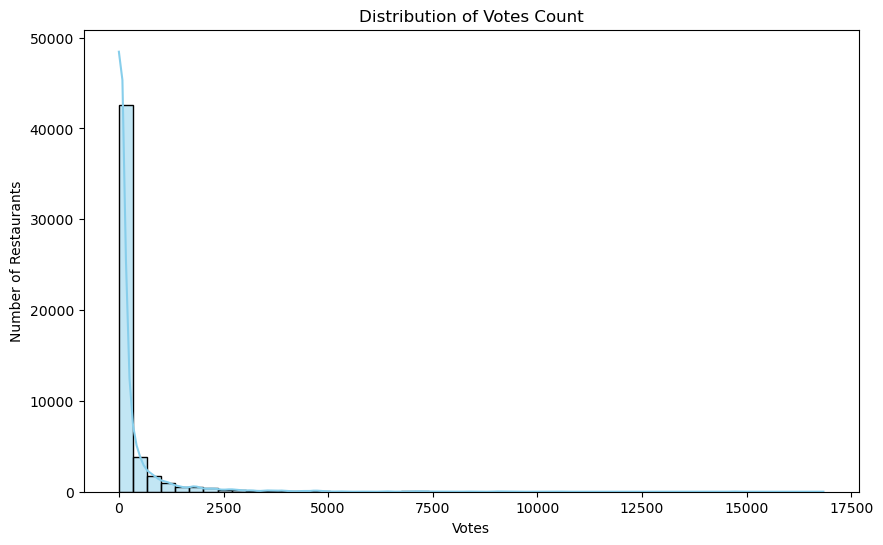

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['votes'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Votes Count')
plt.xlabel('Votes')
plt.ylabel('Number of Restaurants')
plt.show()


 Rating Distribution

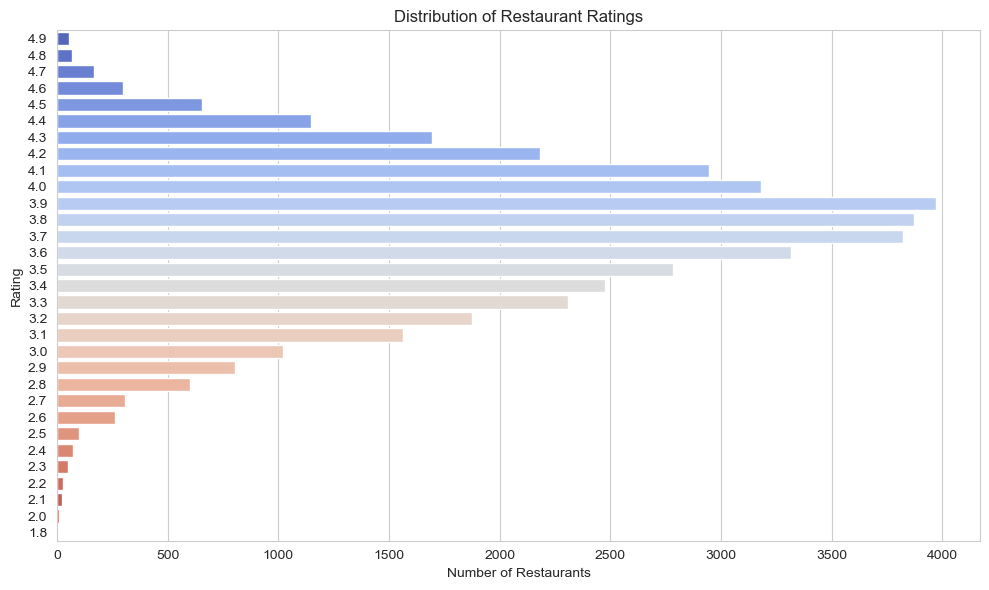

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean column names and rate column
df.columns = df.columns.str.strip()
df['rate'] = df['rate'].astype(str).str.strip()
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], None)
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.countplot(y='rate', data=df, order=df['rate'].value_counts().sort_index(ascending=False).index, palette='coolwarm')

plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Number of Restaurants')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()




Top Cuisines

Top 10 Cuisines:
cuisines
North Indian    21085
Chinese         15547
South Indian     8644
Fast Food        8096
Biryani          6492
Continental      5765
Desserts         5633
Cafe             5303
Beverages        4747
Italian          3389
Name: count, dtype: int64


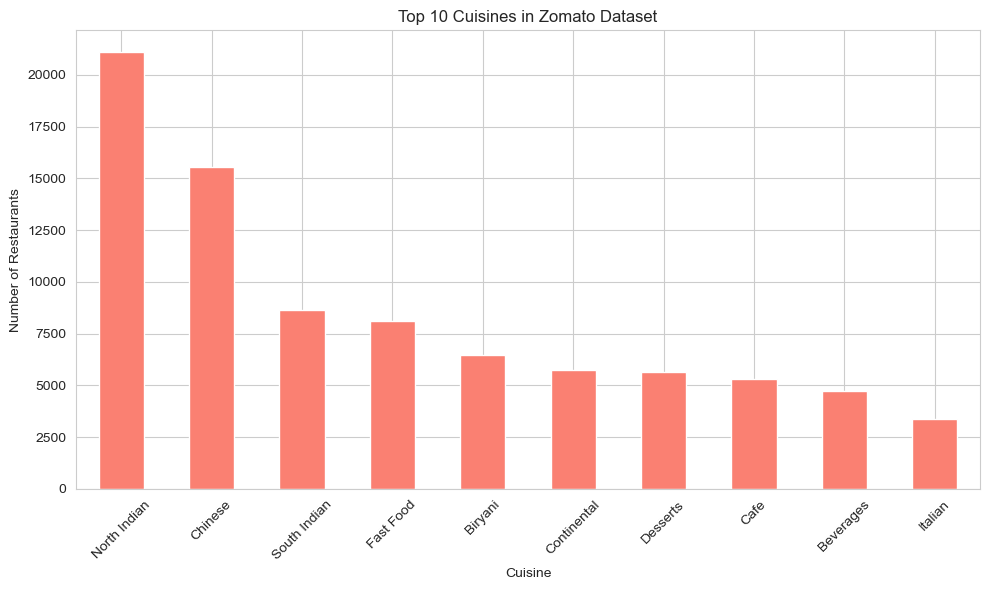

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = r"C:\Users\shish\Desktop\zomato.csv"
df = pd.read_csv(file_path, lineterminator='\n')

# Clean column names
df.columns = df.columns.str.strip()

# Drop missing values in 'cuisines' column
df = df.dropna(subset=['cuisines'])

# Split comma-separated cuisines and count
top_cuisines = df['cuisines'].str.split(', ').explode().value_counts().head(10)

# Display top cuisines
print("Top 10 Cuisines:")
print(top_cuisines)

# Plot top cuisines
plt.figure(figsize=(10, 6))
top_cuisines.plot(kind='bar', color='salmon')
plt.title('Top 10 Cuisines in Zomato Dataset')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Votes vs Rating corelation

Correlation between Votes and Rating: 0.434


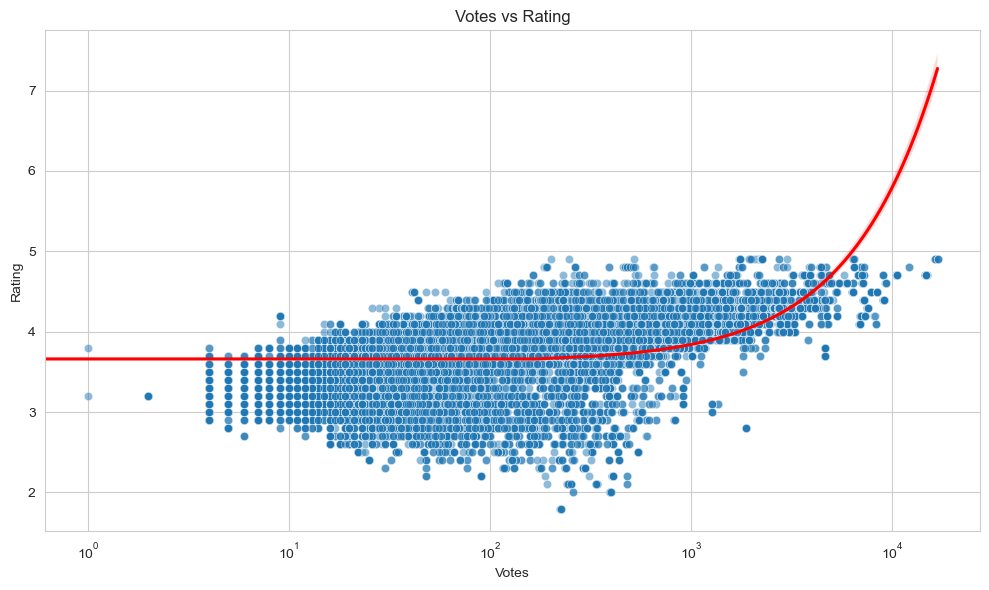

In [37]:
# Clean column names
df.columns = df.columns.str.strip()

# Clean 'rate' column
df['rate'] = df['rate'].astype(str).str.strip()
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], None)
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Ensure 'votes' is numeric
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# Drop rows with missing values in 'rate' or 'votes'
df_corr = df[['rate', 'votes']].dropna()

# Calculate correlation coefficient
correlation = df_corr['rate'].corr(df_corr['votes'])
print(f"Correlation between Votes and Rating: {correlation:.3f}")

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x='votes', y='rate', alpha=0.5)
sns.regplot(data=df_corr, x='votes', y='rate', scatter=False, color='red')  # trendline
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.xscale('log')  # use log scale for better visualization
plt.tight_layout()
plt.show()

Top rated Restuarants

In [38]:
# Clean column names
df.columns = df.columns.str.strip()

# Clean and convert 'rate' column
df['rate'] = df['rate'].astype(str).str.strip()
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], None)
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Drop rows with missing ratings
df_clean = df.dropna(subset=['rate'])

# Sort by highest rating and then by votes (optional for breaking ties)
top_restaurants = df_clean.sort_values(by=['rate', 'votes'], ascending=[False, False])

# Select relevant columns to display
columns_to_show = ['name', 'rate', 'votes', 'cuisines', 'location']  # update based on your dataset

# Show top 10
print("Top Rated Restaurants:")
print(top_restaurants[columns_to_show].head(10))


Top Rated Restaurants:
                              name  rate  votes  \
49170  Byg Brewski Brewing Company   4.9  16832   
49627  Byg Brewski Brewing Company   4.9  16832   
50059  Byg Brewski Brewing Company   4.9  16832   
3921   Byg Brewski Brewing Company   4.9  16345   
4801   Byg Brewski Brewing Company   4.9  16345   
4944   Byg Brewski Brewing Company   4.9  16345   
37099    AB's - Absolute Barbecues   4.9   6490   
21279    AB's - Absolute Barbecues   4.9   6452   
19393    AB's - Absolute Barbecues   4.9   6404   
21770    AB's - Absolute Barbecues   4.9   6404   

                                                cuisines       location  
49170  Continental, North Indian, Italian, South Indi...  Sarjapur Road  
49627  Continental, North Indian, Italian, South Indi...  Sarjapur Road  
50059  Continental, North Indian, Italian, South Indi...  Sarjapur Road  
3921   Continental, North Indian, Italian, South Indi...  Sarjapur Road  
4801   Continental, North Indian, Italian, So

Price Range vs Rating 

C:\Users\shish\AppData\Local\Temp\ipykernel_228\416542311.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cost_bin'] = pd.qcut(df_clean['cost'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])


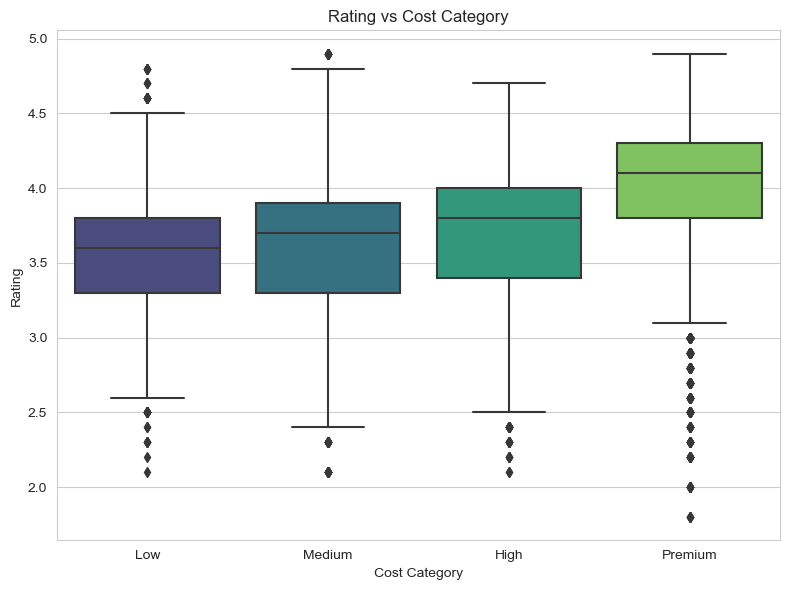


Average Rating per Cost Category:
cost_bin
Low        3.57
Medium     3.60
High       3.69
Premium    3.99
Name: rate, dtype: float64


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"C:\Users\shish\Desktop\zomato.csv"
df = pd.read_csv(file_path, lineterminator='\n')

# Clean column names
df.columns = df.columns.str.strip()

# Clean 'rate' column
df['rate'] = df['rate'].astype(str).str.strip()
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], None)
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Clean 'approx_cost(for two people)' column and rename
df.rename(columns={'approx_cost(for two people)': 'cost'}, inplace=True)
df['cost'] = df['cost'].astype(str).str.replace(',', '').str.strip()
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['rate', 'cost'])

# Create cost bins using quartiles
df_clean['cost_bin'] = pd.qcut(df_clean['cost'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])

# Plot boxplot: Rating vs Cost Category
plt.figure(figsize=(8, 6))
sns.boxplot(x='cost_bin', y='rate', data=df_clean, palette='viridis')
plt.title('Rating vs Cost Category')
plt.xlabel('Cost Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# Optional: Print average rating per cost bin
print("\nAverage Rating per Cost Category:")
print(df_clean.groupby('cost_bin')['rate'].mean().round(2))


Does Rating Influence cost of Restruarants

Pearson correlation coefficient: 0.385
P-value: 0.000e+00


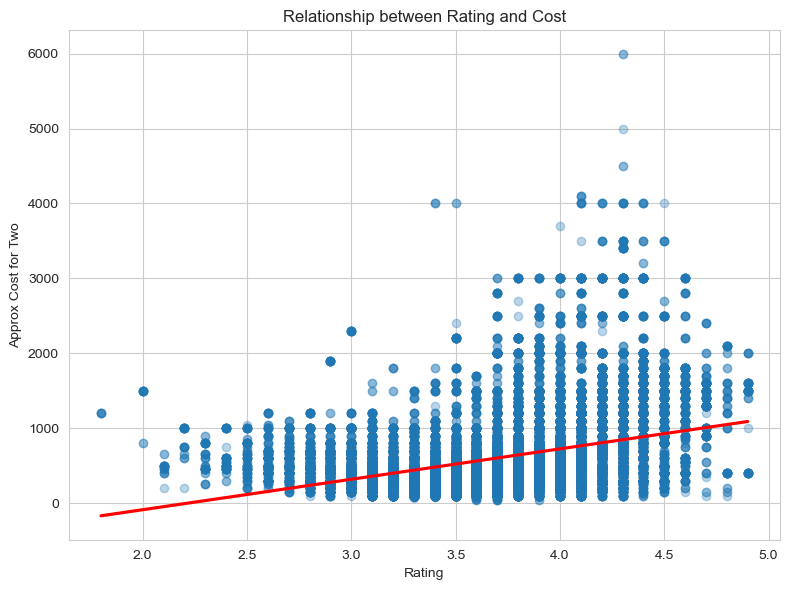

In [42]:
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr  # <- Make sure this line is here

# Load dataset
file_path = r"C:\Users\shish\Desktop\zomato.csv"
df = pd.read_csv(file_path, lineterminator='\n')

# Clean columns
df.columns = df.columns.str.strip()

# Clean and convert 'rate' column
df['rate'] = df['rate'].astype(str).str.strip()
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], None)
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Clean and convert 'approx_cost(for two people)'
df.rename(columns={'approx_cost(for two people)': 'cost'}, inplace=True)
df['cost'] = df['cost'].astype(str).str.replace(',', '').str.strip()
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['rate', 'cost'])

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(df_clean['rate'], df_clean['cost'])
print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3e}")

# Visualization: Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='rate', y='cost', data=df_clean, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship between Rating and Cost')
plt.xlabel('Rating')
plt.ylabel('Approx Cost for Two')
plt.tight_layout()
plt.show()


Top rated Resturants with online delivery

In [45]:
import pandas as pd

# Load dataset
file_path = r"C:\Users\shish\Desktop\zomato.csv"
df = pd.read_csv(file_path, lineterminator='\n')

# Clean columns
df.columns = df.columns.str.strip()

# Clean and convert 'rate' column
df['rate'] = df['rate'].astype(str).str.strip()
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], None)
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Filter for online delivery available
online_df = df[df['online_order'].str.strip().str.lower() == 'yes']

# Drop rows with missing ratings
online_df = online_df.dropna(subset=['rate'])

# Sort by rating descending
top_online_restaurants = online_df.sort_values(by='rate', ascending=False)

# Display top 10 with available columns
print(top_online_restaurants[['rest_type', 'rate', 'cuisines', 'approx_cost(for two people)', 'votes']].head(10))



                rest_type  rate  \
11745      Dessert Parlor   4.9   
4801         Microbrewery   4.9   
9099   Casual Dining, Bar   4.9   
37613  Casual Dining, Bar   4.9   
27453  Casual Dining, Bar   4.9   
36684  Casual Dining, Bar   4.9   
46960       Casual Dining   4.9   
7118        Casual Dining   4.9   
50059        Microbrewery   4.9   
46253       Casual Dining   4.9   

                                                cuisines  \
11745                                           Desserts   
4801   Continental, North Indian, Italian, South Indi...   
9099                         Asian, Chinese, Thai, Momos   
37613                        Asian, Chinese, Thai, Momos   
27453                        Asian, Chinese, Thai, Momos   
36684                        Asian, Chinese, Thai, Momos   
46960                              North Indian, Mughlai   
7118                                        North Indian   
50059  Continental, North Indian, Italian, South Indi...   
46253         